# Computational Experiments -- Recombination vs Recurrence

## Goals
We aim to examine how the *incompatibility graph* produced by cross-over recombination differs from that produced by recurrent mutation. Ideally this experiment would help us develop and comunicate intuition for how the two models of sequence evolution difer, which would then allow us to distinguish the two types of events from one another with greater ease.

If appropriate, results from this experiment could be included in the paper togherer with or instead of the conceptual illustrations in figure 4.

## Potential experiments
Multiple different approaches seem possible:

1. Qualitative
    
  1. Use rejection sampling to simulate two datasets:
     * One with a single recombination evident in data.
     * One with a single recurrent mutation evindent in data.

  2. Fix two mutation rates $0 < \theta_{\text{low}} \ll \theta_{\text{high}}$ and a recombination-rate $\rho > 0$.
     Proceed to simulate two diferent datasets:       
     * One mutation rate $\theta_{\text{low}}$ and recombination rate $\rho$.
     * One mutation rate $\theta_{\text{high}}$ and recombination rate $0$.
       
    In either case, we would then for each dataset compute the incompatibility-graph and display the two side by side. THe experiment could be re-run to examine by naked eye the variation possible.

2. Quantitative
    
  1. Statistical properties of the incompatibility graph under either model: sample a large number of datasets under either model; for each dataset, compute the incompatability graph. Compute sample averages of graph-statistics for either model (e.g compare the degree-distribution in the graphs).
    * A simple statistic to distinguishing a star-shaped graph from a regular bipartite one might be $\max_{v \in V} \deg(v)$.
  2. Search for a good classifier: simulate a large set of incompatibility graphs for either model (like above). Attempt to construct a classifier that accurately predicts to which class new simulated incompatibility graphs belong.
    * Initially, seeing how various rules of thumb perform would be interesting.
    * Long term: we could examine classic classifiers fomr the mashine learning litterature, e.g. Support vecor machines or neural networks.

## Planned approach
I intend to start out with conducting experiment 1.B. (maybie even starting out with $\theta_{\text{high}} = \theta_{\text{low}}$)
    
 * A good example would fit well into the article we are writing, and
 * Solving this problem is a stepping stone to solving more complex problems.
    
Afterwards, I would like to approach problem 2.A, and examine how informative $\max_{v \in V} \deg(v)$ is as a statistic for distinguishing the cause of incompatibilities. It might be usefull to contrast the results of experimets 1.A and 1.B.


## Project status

* I have written code for
  * simulating coalescents with recombination (the code calls ms, and parses the results)
  * simulating coalescents under a finite sites model (builds on my older code)
  * runing experiment 1.B (allthough I'm still not entirely sure i know what rates to use).

* next steps:
  * plotting output
  * automating larger experiments

# Code: setting the stage for our experiments

In [1]:
%matplotlib inline
import sys

In [2]:
## I import my simulator
simulations_dir = '../../coalescent-simulations'
sys.path.append(simulations_dir)
import finiteSitesModell_investigations as fsmi
import matplotlib.pyplot as plt

In [3]:
import networkx as nx

In [4]:
from incompatability_graph_experiments import *

In [5]:
import incompatability_graph_experiments as ige

In [82]:
reload(ige) #for when i'm edditing the library during testing
reload(fsmi)

<module 'finiteSitesModell_investigations' from '../../coalescent-simulations/finiteSitesModell_investigations.pyc'>

In [7]:
#fsmi.generate_plots_for_jotun(thetaMax=10,thetaMin=0.1,steps=3,N=10,savePath='')

In [8]:
## playing around with networkx to learn how it works

# G = nx.Graph()
# G.add_nodes_from(range(20))
# G.add_edges_from([(i,10+i) for i in range(10)])

# nx.draw(G)

#nx.draw_spectral(G)

#nx.draw_shell(G)

#nx.draw_random(G)

#nx.draw_spring(G)

#G2 = nx.Graph()

#G2.add_edges_from([(1,i) for i in range(2,11)])

#print G2.edges()

#nx.draw_shell(G2)

#nx.draw_spring(G2)

#G2.add_edge(10,11)
#nx.draw_spring(G2,with_labels=True, node_color = 'w')

#[g for g in nx.components.connected.connected_component_subgraphs(G2)][0]

## A simple experiment -- simulating recurrent mutation and outputting incompatibility graphs

We sample a finite sites model with mutation rate $\frac{\theta}{2}$, compute the incompatibility graph and output its largest component. Note that there is no conditioning on the number of segregating sites or recurring mutations in this experiment.

When displaying the largest connected component of the incompatability graph, each labelled with the site it represents and coloured according to the number of mutations affecting that site. The colouring scheme used was the following:

```python
    indexed_palette = {
                    0:'white',
                    1:'pink',
                    2:'turquoise',
                    3:'lightgrey',
                    4:'blue',
                    5:'purple',
                    6:'yellow',
                    7:'darkgreen',
                    8:'lime',
                    9:'teal',
                    10:'black',
                    11:'green',
                    12:'red',
                    13:'orange'}

```
At the request of Jotun, I also print the incompatibility graph of the largest connected component.

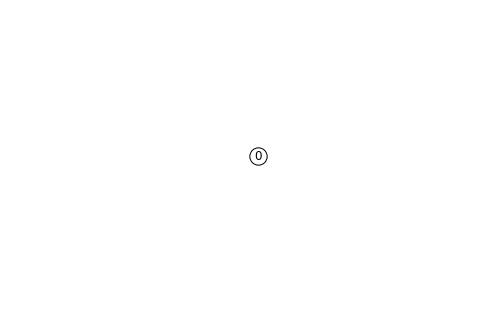

In [9]:
np.random.seed(1723000000)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)
G_sim = results['graph']
sim = results['simulation']
plt.savefig('figures/incompatibility_graphs_jotuns_favourite_n15_L1000_t25.pdf',bbox_inches=0)
plt.savefig('figures/incompatibility_graphs_jotuns_favourite_n15_L1000_t25.png',bbox_inches=0)

As we see, sometimes, the largest connected component looks a bit boring.

We may repeat the entire experiment carried out above with a different seed, as below:

[[1 1 1 3]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 3 3]
 [2 3 3 0]
 [0 0 3 3]
 [2 3 3 3]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [0 0 0 3]
 [2 3 3 3]
 [0 0 0 0]
 [0 0 0 0]]


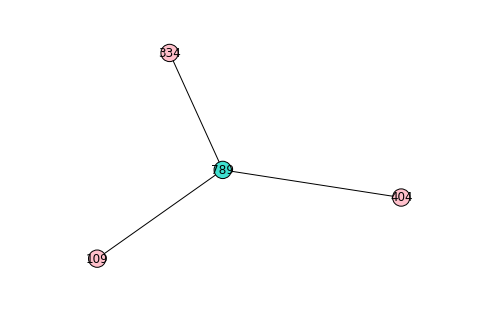

In [10]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 1000, theta = 25.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

We may also vary the parameters (below, we increase the number of sites tenfold and double the total mutation rate)

[[ 1  1  1 13  1  1  1  1  1  1  1  1  1  1]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 3  0  3  3  2  0  1  3  2  0  2  0  1  2]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 3  0  3  0  2  0  1  3  2  0  2  0  1  2]
 [ 3  0  3  3  2  0  1  3  2  0  2  0  1  2]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]
 [ 0  2  0  3  0  3  0  0  0  3  0  2  0  0]]


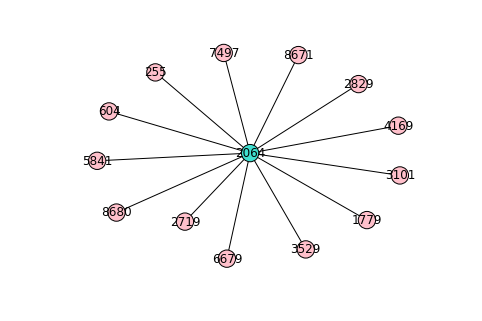

In [11]:
np.random.seed(172300006)
results = simulate_single_graph_and_output_incompatibility_graph(n =15, L = 10000, theta = 50.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)

***Observation:*** When the site-wise mutation rate is high, the incompatibility graph stops being' star-shaped.

Below, we see some examples of this (we also output the characters associated with the output graph, the underlying coalescent, and the edges of the incompatibility-graph)

[[1 1 3 3 2]
 [1 0 1 3 0]
 [1 2 0 1 0]
 [2 3 0 3 2]
 [3 0 2 3 0]
 [2 3 2 1 2]]
[(0.0, 'P:[[0], [1], [2], [3], [4]]'
0.09478121199026035, 'P:[[0], [1], [2, 4], [3]]'
0.6948849372387138, 'P:[[0], [1, 2, 4], [3]]'
0.8246096266937557, 'P:[[0, 3], [1, 2, 4]]'
4.942676266703163, 'P:[[0, 1, 2, 3, 4]]')]
[(0, 6), (3, 4), (4, 8), (4, 6), (6, 8)]


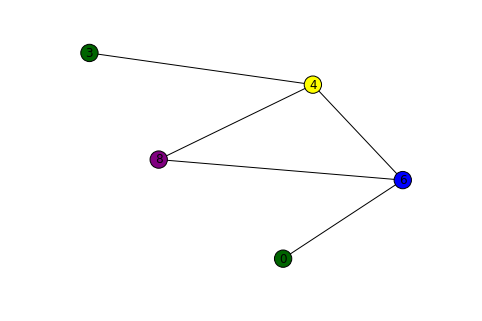

In [12]:
np.random.seed(172300001)
results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 10.0, draw_largest_connected_component = True)
determine_S_of_connected_components(results,with_header=True)
sim = results['simulation']
print '\n'.join(str.split(str(sim.coal),'), ('))
print results['graph'].edges()

If we for the moment ignore the S-matricees, we can generate a larger array of incompatibility matricees to see the diversity at different mutation rates.

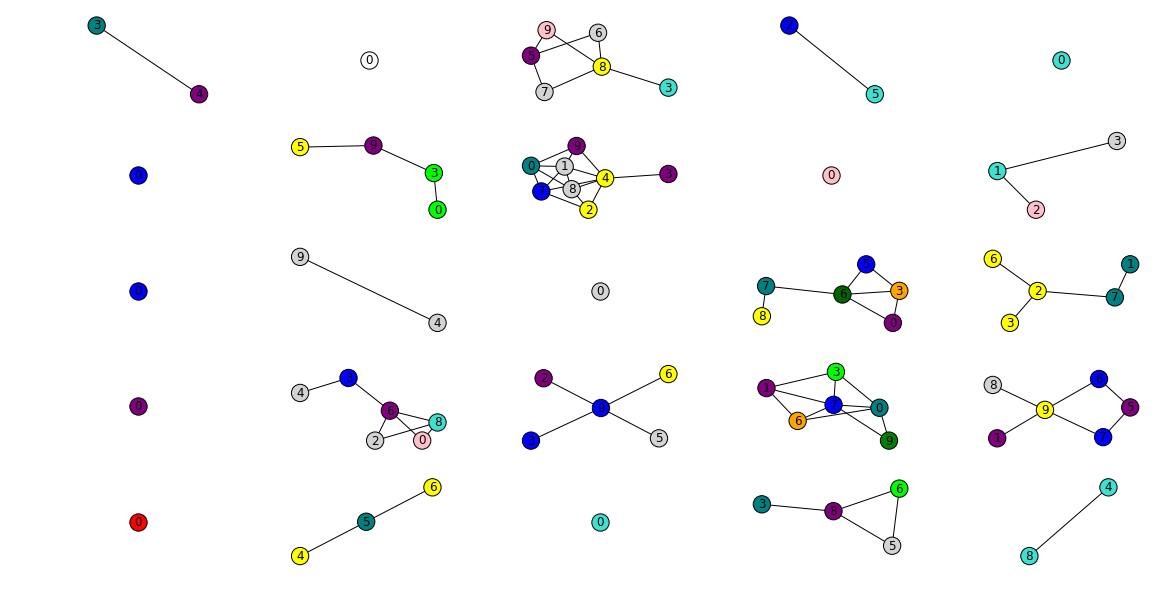

In [13]:
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i+1)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =5, L = 10, theta = 20.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n5_L10_t10.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n5_L10_t10.png',bbox_inches=0)

We now preceed to make pictures like above, but with different parameter valies. I will start examinig what happens as the site-wise mutation rate is increased for 3 sequences observed at 10 sites:

## Setting: $n=3, L = 10, \theta = 1$

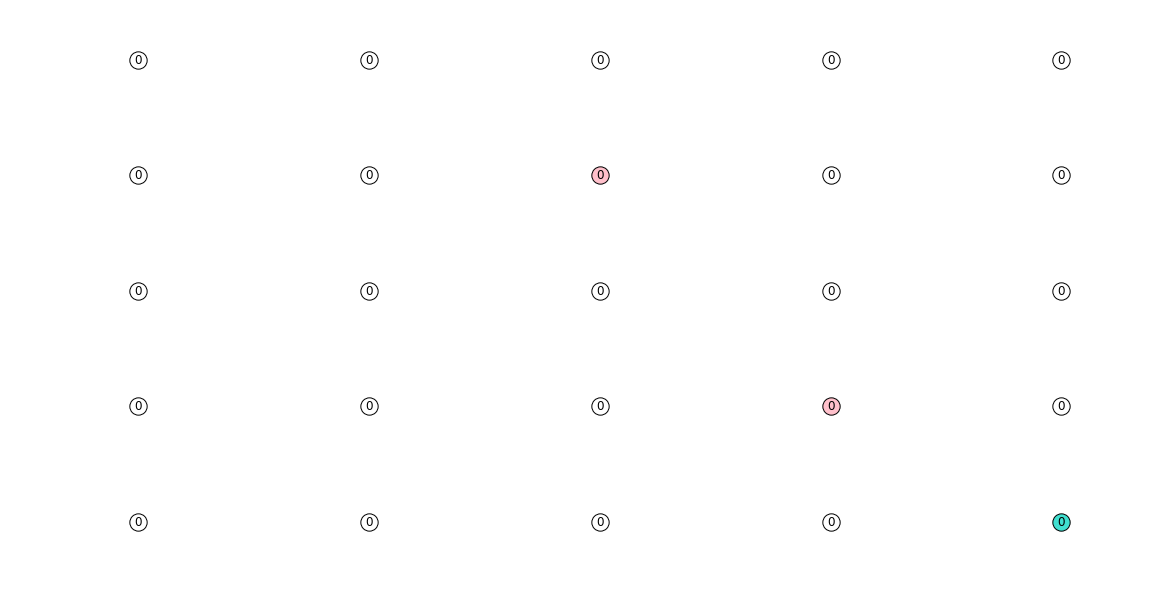

In [14]:
np.random.seed(1723)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i+1)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 10, theta = 1.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t1.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t1.png',bbox_inches=0)

We see that little is going on here (as expected).

## Setting: $n=3, L = 10, \theta = 5$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

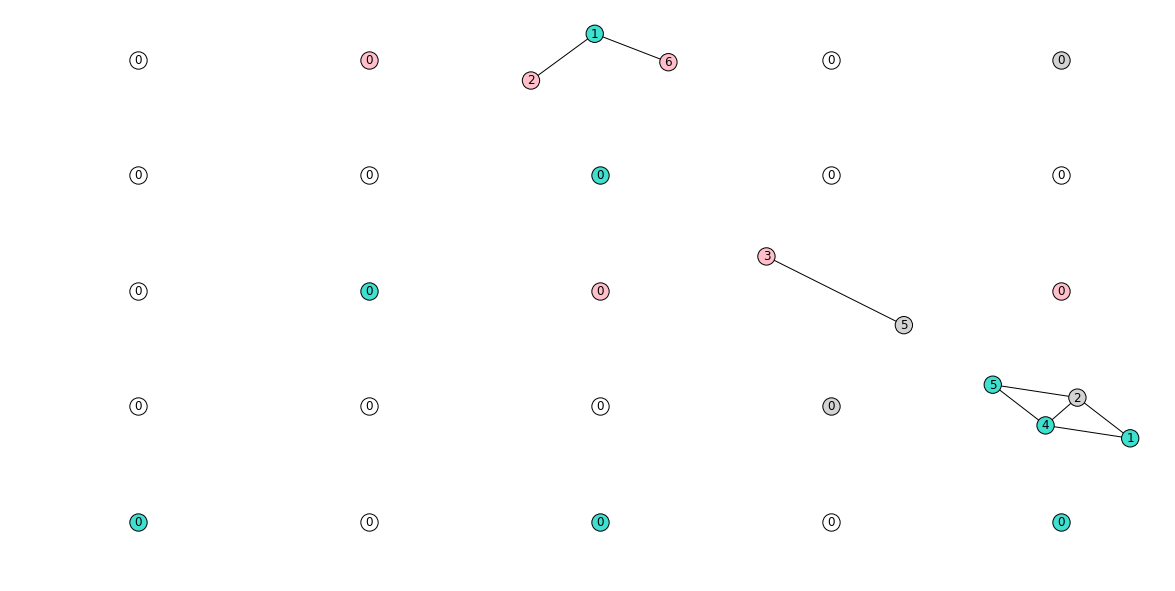

In [15]:
np.random.seed(2317)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i+1)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3 , L = 10, theta = 5.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t5.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L10_t5.png',bbox_inches=0)

We see here that this leads to an increased pressence of incompatibilities, and that the structure fo the incompatibility graph is less predictable: the number of mutations affecting the incompatible loci (given by the colour of each locus) is no longer minimal in many instances, and the graph is not always star-shaped.

### We now carry out the above experiments with the same values of $n$ and $\frac{\theta}{2L}$, but $L = 100$

## Setting: $n=3, L = 100, \theta = 10$

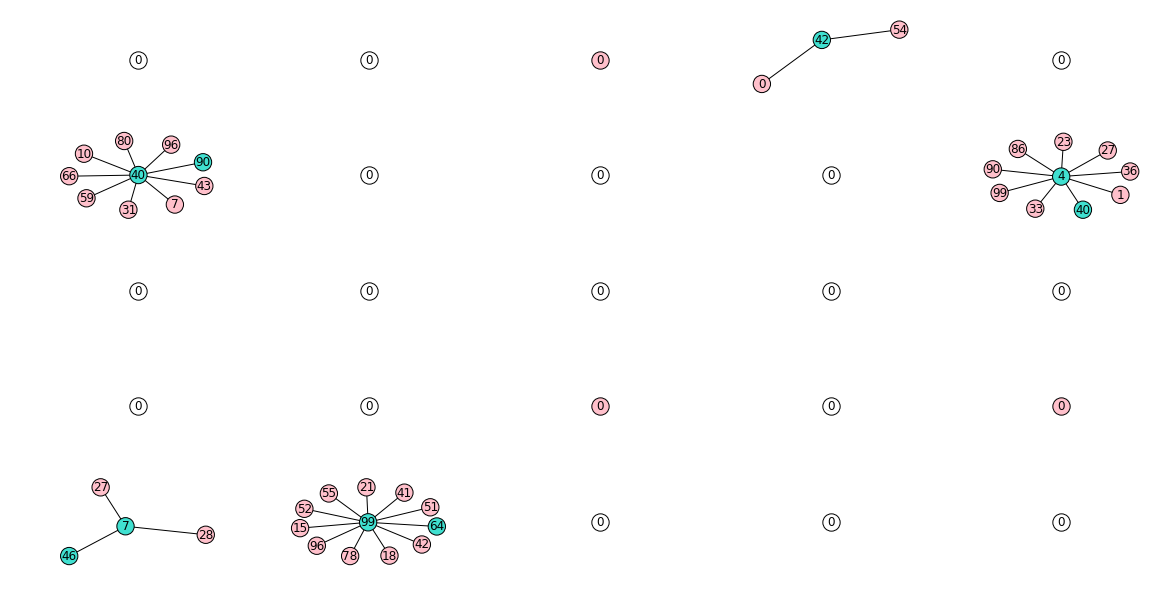

In [16]:
np.random.seed(1723)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
for i in range(graphs):
    plt.subplot(rows,cols,i+1)
    #print i
    results = simulate_single_graph_and_output_incompatibility_graph(n =3, L = 100, theta = 10.0, draw_largest_connected_component = True)
    #print 
    determine_S_of_connected_components(results,print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t10.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t10.png',bbox_inches=0)

We see that more is going on here than before. A possible explanation thereof is as follows: although each individual column will be subject to the same number of mutations, there is a higher probability that at least *some* columns will be incompatilbe (the there are more of them).

## Setting: $n=3, L = 100, \theta = 50$
(same as before but the site wise mutation rate $\frac \theta {2 L}$ is increased to 0.25 (a tenfold increase)

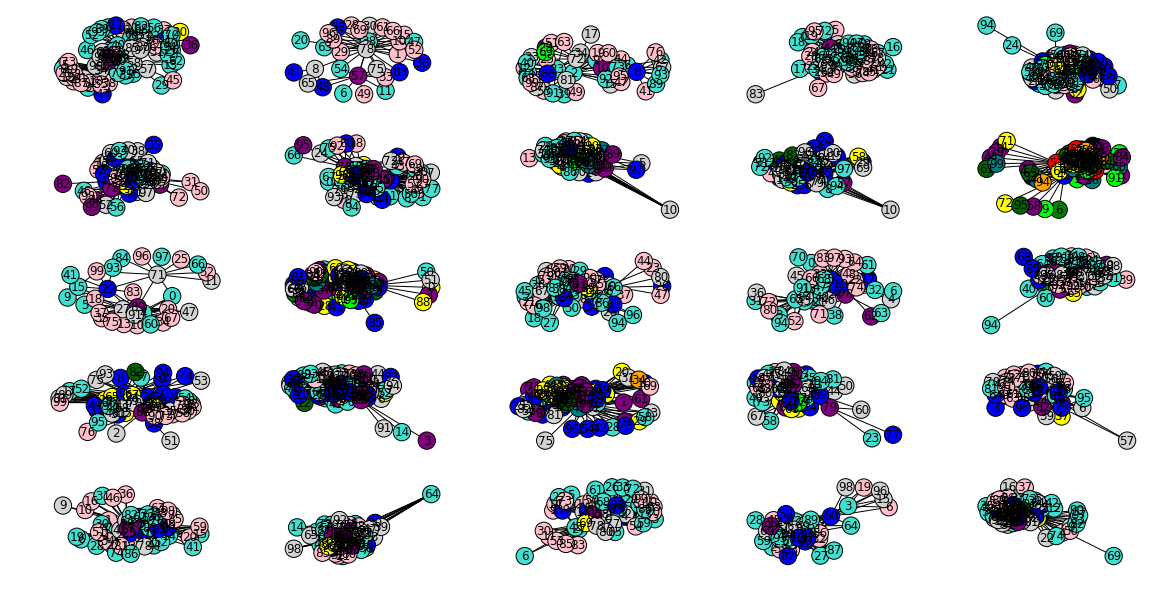

In [17]:
np.random.seed(2317)
fig = plt.figure(figsize = (20,10))
cols = 5
rows = 5
graphs = rows*cols
results = []
for i in range(graphs):
    plt.subplot(rows,cols,i+1)
    #print i
    results.append(simulate_single_graph_and_output_incompatibility_graph(n =10 , L = 100, theta = 100.0, draw_largest_connected_component = True))
    #print 
    determine_S_of_connected_components(results[-1],print_results=False,with_header=True)
plt.draw()
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t50.pdf',bbox_inches=0)
fig.savefig('figures/incompatibility_graphs_5x5_n3_L100_t50.png',bbox_inches=0)

As before: increasing $\theta$ will lead to a more diverse class of larger incompatibility graphs. An interesting observation here is however that the graphs still seem highly centralized.

An interesting observation is it seems that there often seem to be a few hub-nodes affected by a higher number of mutaions, and that edge-nodes tend to be incompatible with almost all of them.

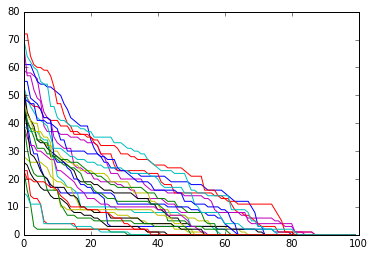

In [18]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot(deg_arr)

We  can re-normalize the above plot, if we are more interested the decay of degrees 

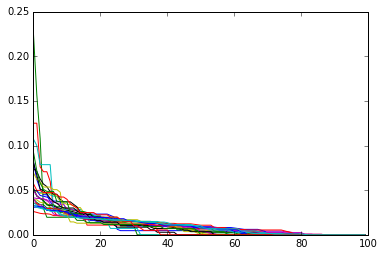

In [19]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot(deg_arr/sum(degrees))

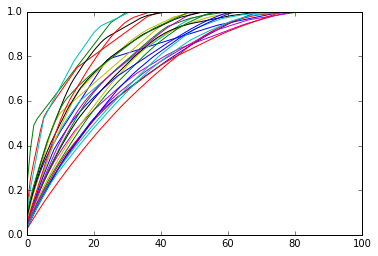

In [20]:
for res in results:
    degrees = res['graph'].degree().values()
    degrees.sort(reverse = True)
    deg_arr = np.array(degrees,dtype = float)
    plt.plot([sum(deg_arr[:i+1])/sum(degrees) for i in xrange(len(degrees))])

# EXPERIMENT 1: recurrent versus recombining

## Sub-experiment 1: $\theta_{\text{high}} = \theta_{\text{low}} = 10$, $\text{sites}=20$, $\rho = 1$

We let the number of sequences be 10 in either case. We simulate each experiment 20 times, and plot the 5 first incompatibility graphs.

In [7]:
np.random.seed(9000)
N = 1000

In [8]:
results = ige.run_experiment_1(N = N, sequences=10, sites = 20, theta_low_per_site= 0.5, theta_high_per_site= 0.5, rho_per_site= 0.05)

In [9]:
print results['incomp_rate_recurr'] * N,results['incomp_rate_recomb']*N
print results['incomp_rate_recurr'] * 100,results['incomp_rate_recomb']*100

764.0 430.0
76.4 43.0


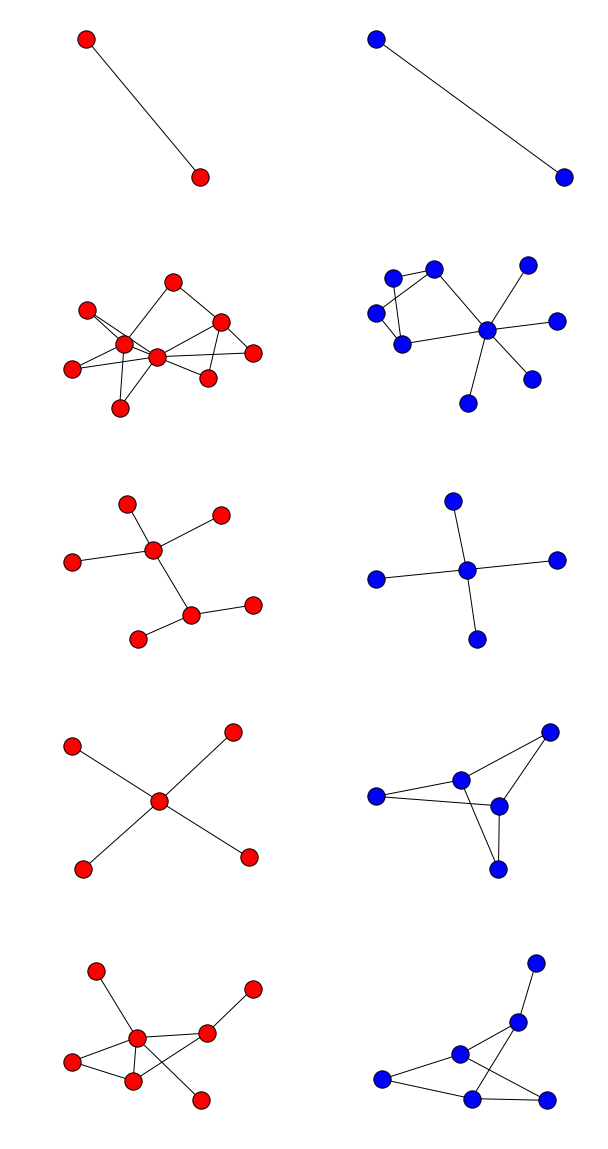

In [10]:
ige.generate_plots_experiment_1(results)

## Sub-experiment 1.1: $\theta_{\text{high}} = \theta_{\text{low}} = 1$, $\text{sites}=20$, $\rho = 1$

We let the number of sequences be 10 in either case. We simulate each experiment 20 times, and plot the 5 first incompatibility graphs.

In [11]:
np.random.seed(9000)
N = 10000
n = 10
sites = 20
theta = 1.0
t_site = theta/sites
rho = 1.0
rho_site = rho/sites

In [12]:
results = ige.run_experiment_1(N = N, sequences=10, sites = sites, theta_low_per_site= t_site, theta_high_per_site= t_site, rho_per_site= rho_site)

In [13]:
print results['incomp_rate_recurr'] * N,results['incomp_rate_recomb']*N
print results['incomp_rate_recurr'] * 100,results['incomp_rate_recomb']*100

164.0 501.0
1.64 5.01


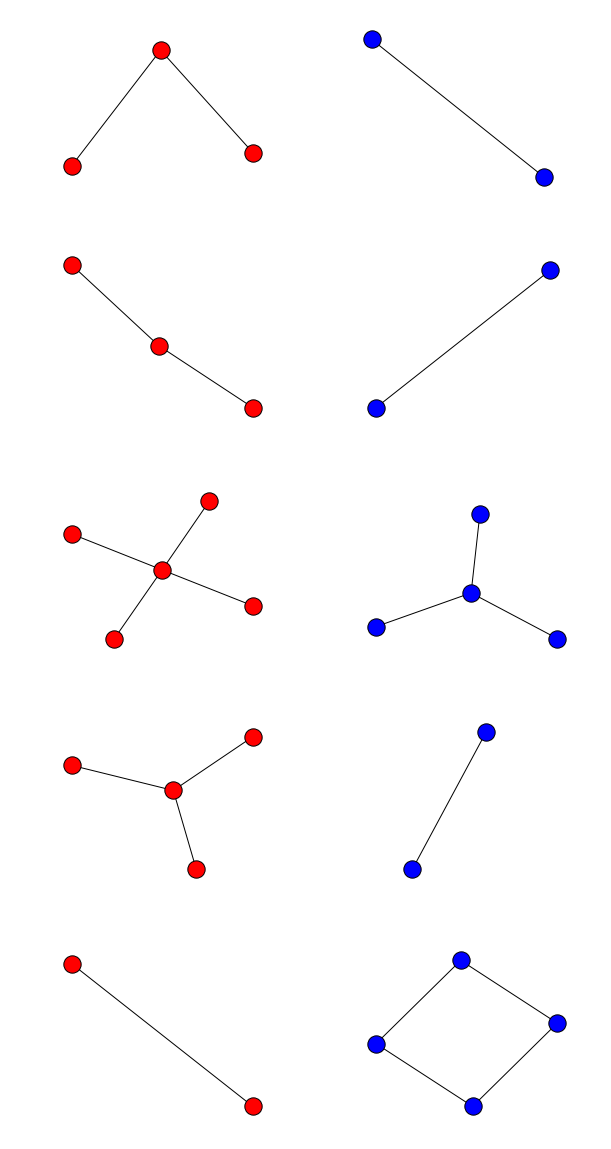

In [14]:
ige.generate_plots_experiment_1(results)

one_over_rho = str(int(1/rho))
#rho_str = '1_over_%s'%one_over_rho
rho_str = '1'

figname = 'figures/exp_1_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(theta),str(theta),rho_str)
plt.savefig('%s.pdf'%figname,bbox_inches=0)
plt.savefig('%s.png'%figname,bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

In [15]:
print sum(map(compute_staryness,results['recomb_graphs_incomp']))/len(results['recomb_graphs_incomp'])
print sum(map(compute_staryness,results['recurrent_graphs_incomp']))/len(results['recurrent_graphs_incomp'])

0.940718562874
0.998475609756


In [16]:
sum(map(compute_staryness,results['recomb_graphs_incomp']))

471.3

## Sub-experiment 2: $\theta_{\text{high}} = \theta_{\text{low}} = 100$, $\text{sites}=2.000$, $\rho = 1$

In [17]:
np.random.seed(9005)

In [18]:
np.random.seed(9000)
N = 50
sites = 2000
theta = 100.0
t_site = theta/sites
rho = 1.0
rho_site = rho/sites

In [19]:
results_2 = ige.run_experiment_1(N = N, sequences=10, sites = sites, theta_high_per_site= t_site, theta_low_per_site = t_site, rho_per_site= rho_site)

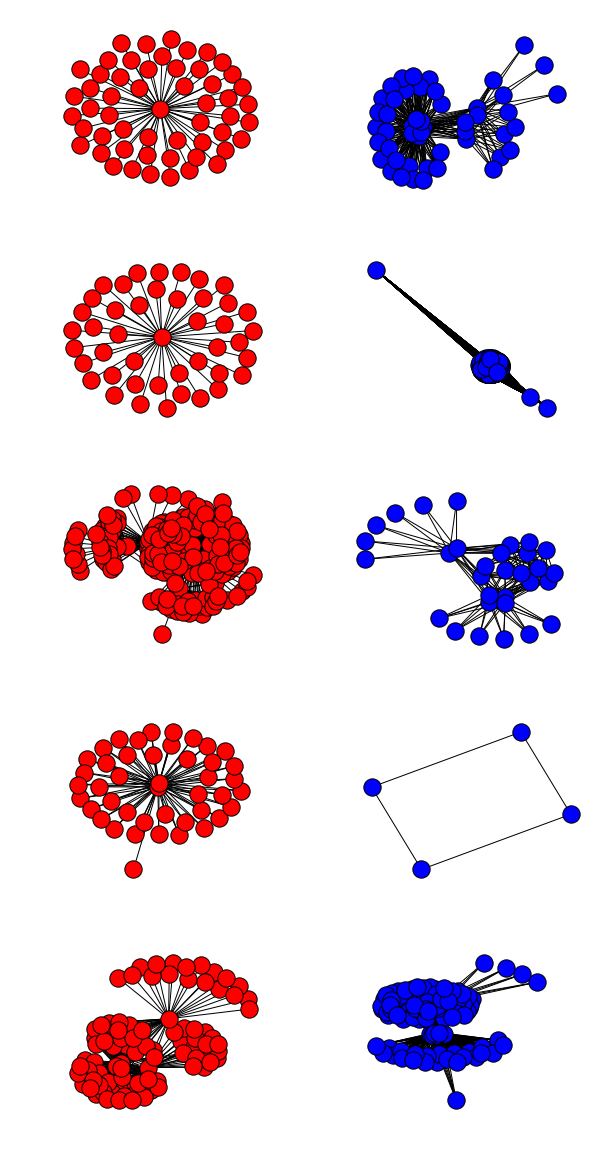

In [20]:
np.random.seed(9000)
ige.generate_plots_experiment_1(results_2)


one_over_rho = str(int(1/rho))
#rho_str = '1_over_%s'%one_over_rho
rho_str = '1'

figname = 'figures/exp_2_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(t_site),str(t_site),rho_str)
plt.savefig('%s.pdf'%figname,bbox_inches=0)
plt.savefig('%s.png'%figname,bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

In [41]:
print results_2['incomp_rate_recurr'] * N,results_2['incomp_rate_recomb']*N
print results_2['incomp_rate_recurr'] * 100,results_2['incomp_rate_recomb']*100

44.0 33.0
88.0 66.0


In [21]:
G_test = results_2['recomb_graphs_incomp'][0]
#E = len(G.edges())
#G.degree().values()[:50]
def compute_staryness(G):
    '''
    Takes a graph as input, and returns the quantity deg_max/|E|
    where deg_max is the maximum degree of a node in the graph, and
    |E| is the total number of edges in the graph.
    '''
    return float(max(G.degree().values()))/len(G.edges())
#print compute_staryness(G_test)
print sum(map(compute_staryness,results_2['recomb_graphs_incomp']))/len(results_2['recomb_graphs_incomp'])
print sum(map(compute_staryness,results_2['recurrent_graphs_incomp']))/len(results_2['recurrent_graphs_incomp'])

0.124119178708
0.549786525841


## Sub-experiment 3:
* $\text{sites}= 20.000$
* $n = 10$
* $\theta_{\text{high}} = \theta_{\text{low}} = \frac{\text{sites}}{10^{4}} = 2$
* $\rho = \frac{\text{sites}}{20.000} = 1$

In [22]:
#np.random.seed(9005)

In [23]:
seed = 9000
N = 200 #Number of coalescents to simulate (for each case in [recurrent, recombinant])

sites = 20000
n = 10
t_high = float(2)
t_low = float(2)
rho = float(1)

t_high_per_site = t_high/sites
t_low_per_site = t_low/sites
rho_per_site = rho/sites

In [24]:
np.random.seed(seed)
results = ige.run_experiment_1(N = N, sequences=n, sites = sites, theta_high_per_site= t_high_per_site ,theta_low_per_site = t_low_per_site, rho_per_site= rho_per_site)

In [25]:
print results['incomp_rate_recurr'] * N,results['incomp_rate_recomb']*N
print results['incomp_rate_recurr'] * 100,results['incomp_rate_recomb']*100

0.0 32.0
0.0 16.0


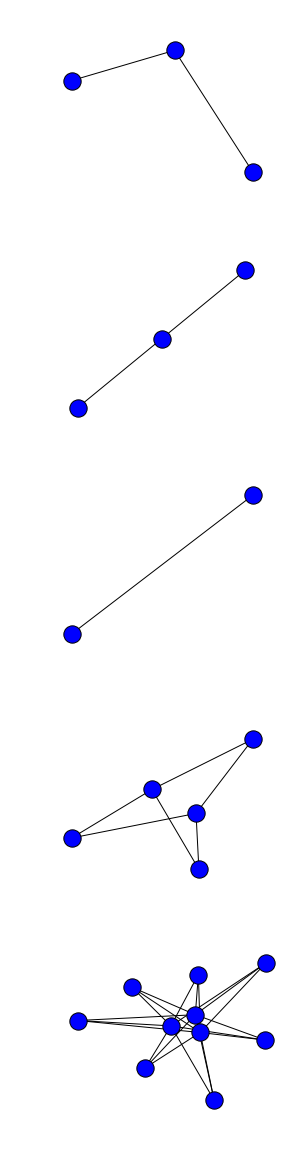

In [26]:
ige.generate_plots_experiment_1(results)

In [27]:
figname = 'figures/exp_1_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(t_high),str(t_low),str(rho))
fig.savefig('%s.pdf'%figname,bbox_inches=0)
fig.savefig('%s.png'%figname,bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

NameError: name 'fig' is not defined

In [28]:
# import cProfile, pstats, StringIO

# pr = cProfile.Profile()
# pr.enable()

# results = ige.run_experiment_1(N = 200, sequences=10, sites = 20000, theta_high_per_site= 0.0001, theta_low_per_site = 0.0001, rho_per_site= 0.00005)

# s = StringIO.StringIO()
# sortby = 'cumtime'
# ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
# ps.print_stats()
# print s.getvalue()

## Sub-experiment 4 -- approximate human rates for DNA:
We use rates from [1]. We presume that we observe a 1 Mb region, related by a coalescent with effective population size 40.000, and a mutation-rate per base-pair of $\mu = 5 \cdot 10^{-11}$. Recombination rates are from [2]
* $\text{sites}= 10^{6}$
* $n = 10$
* $\theta_{\text{high}} = \theta_{\text{low}} = N_e \cdot \text{sites} \cdot \mu = (4 \cdot 10^{4}) \cdot 10^{6} \cdot (5 \cdot 10^{-11})$ = 2
* $\rho = 1.133\frac{\text{cM}}{Mb} \cdot \text{sites (in Mb)}= 1.133 \cdot 0.01 \cdot \frac{1 Mb}{Mb} = 0.01133$

#### References
[1] Drake, J.W., Charlesworth, B., Charlesworth, D., Crow, J.F., 1998. Rates of spontaneous mutation. Genetics 148, 1667–1686.

[2] Dumont, B.L., Payseur, B.A., 2008. Evolution of the genomic rate of recombination in mammals. Evolution (N. Y). 62, 276–294. doi:10.1111/j.1558-5646.2007.00278.x

In [29]:
#np.random.seed(9005)
#1.133 * 0.01

In [30]:
seed = 9000
N = 200 #Number of coalescents to simulate (for each case in [recurrent, recombinant])

sites = int(10e6)
n = 10
t_high = float(2)
t_low = float(2)
rho = float(0.01133)

t_high_per_site = t_high/sites
t_low_per_site = t_low/sites
rho_per_site = rho/sites

# PROBLEM: THIS CRACHES THE KERNEL!!! (probably, 10E6 sites is too much)

In [31]:
# np.random.seed(seed)
# results = ige.run_experiment_1(N = N, sequences=n, sites = sites, theta_high_per_site= t_high_per_site ,theta_low_per_site = t_low_per_site, rho_per_site= rho_per_site)

In [32]:
# ige.generate_plots_experiment_1(results)

In [33]:
# figname = 'figures/exp_1_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(t_high),str(t_low),str(rho))
# fig.savefig('%s.pdf'%figname,bbox_inches=0)
# fig.savefig('%s.png'%figname,bbox_inches=0)
## fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
## fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

In [34]:
# import cProfile, pstats, StringIO

# pr = cProfile.Profile()
# pr.enable()

# results = ige.run_experiment_1(N = 200, sequences=10, sites = 20000, theta_high_per_site= 0.0001, theta_low_per_site = 0.0001, rho_per_site= 0.00005)

# s = StringIO.StringIO()
# sortby = 'cumtime'
# ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
# ps.print_stats()
# print s.getvalue()

## Sub-experiment 4.2 -- same effective rates as before, but lower number of sites (a highter site-wise rate):
We use rates from [1,2]. We presume that we observe a 1 Kb region, but with rates as if though we had been observing a 1 Mb region.
* $\text{sites}= 5 \cdot 10^{3}$
* $n = 10$
* $\theta_{\text{high}} = \theta_{\text{low}} = 2$
* $\rho  = 0.01133$

#### References
[1] Drake, J.W., Charlesworth, B., Charlesworth, D., Crow, J.F., 1998. Rates of spontaneous mutation. Genetics 148, 1667–1686.

[2] Dumont, B.L., Payseur, B.A., 2008. Evolution of the genomic rate of recombination in mammals. Evolution (N. Y). 62, 276–294. doi:10.1111/j.1558-5646.2007.00278.x

In [35]:
#np.random.seed(9005)
#1.133 * 0.01

In [43]:
seed = 9000
N = 1000 #Number of coalescents to simulate (for each case in [recurrent, recombinant])

sites = int(5e3)
n = 10
t_high = float(2)
t_low = float(2)
rho = float(0.01133)

t_high_per_site = t_high/sites
t_low_per_site = t_low/sites
rho_per_site = rho/sites

In [44]:
np.random.seed(seed)
results = ige.run_experiment_1(N = N, sequences=n, sites = sites, theta_high_per_site= t_high_per_site ,theta_low_per_site = t_low_per_site, rho_per_site= rho_per_site)

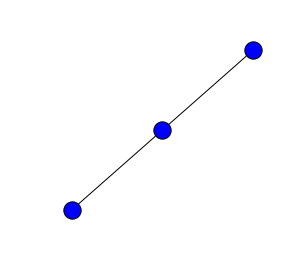

In [45]:
fig = ige.generate_plots_experiment_1(results)

In [46]:

one_over_rho = str(int(1/rho))
rho_str = '1_over_%s'%one_over_rho

figname = 'figures/exp_4.2_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(t_high),str(t_low),rho_str)
fig.savefig('%s.pdf'%figname,bbox_inches=0)
fig.savefig('%s.png'%figname,bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
#fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

AttributeError: 'NoneType' object has no attribute 'savefig'

In [42]:
print results['incomp_rate_recurr'] * N,results['incomp_rate_recomb']*N
print results['incomp_rate_recurr'] * 100,results['incomp_rate_recomb']*100

0.0 0.0
0.0 0.0


##

## Sub-experiment 5 -- approximate human rates for HIV:
We use rates from [1]. [2] Seems like a good reference, but I have had difficulties finding an estimate of the recombination rate for these data. it is worthwhile mentioning that the estimated effective population sizes seem to differ a bit between the two papers (in [1], the lowest value for $N_e$ is $\approx 1500$ with typical values being the double of this, whereas estimates are consitently below $1500$ (closer to 1000) in [2].
* $\text{sites}= 500$
* $n = 30$
* $\theta_{\text{high}} = \theta_{\text{low}} = N_e \cdot \mu \cdot \text{sites} = 1250 \cdot (7.5 \cdot 10^{-5}) \cdot 500 \approx 46$
* $\rho = 1250 (\cdot 2.5 \cdot 10^{-5}) \cdot 500 \approx 16 $

#### References
[1] Seo, T.K., Thorne, J.L., Hasegawa, M., Kishino, H., 2002. Estimation of effective population size of HIV-1 within a host: A pseudomaximum-likelihood approach. Genetics 160, 1283–1293. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1462041/

[2] Dialdestoro, K., Sibbesen, J.A., Maretty, L., Raghwani, J., Gall, A., Kellam, P., Pybus, O.G., Hein, J., Jenkins, P.A., 2016. Coalescent Inference Using Serially Sampled, High-Throughput Sequencing Data from Intrahost HIV Infection. Genetics 202, 1449–1472. doi:10.1534/genetics.115.177931. http://www.pubmedcentral.nih.gov/articlerender.fcgi?artid=PMC4905535

In [65]:
1250*2.5e-5*500

15.625

In [76]:
seed = 9000
N = 25 #Number of coalescents to simulate (for each case in [recurrent, recombinant])

sites = 500
n = 30
t_high = float(1250*7.5e-5*500)
t_low = t_high
rho = float(1250*2.5e-5*500)

t_high_per_site = 1250*7.5e-5
t_low_per_site = t_high_per_site
rho_per_site = 1250*2.5e-5

In [166]:
print t_high,rho

46.875 15.625


In [77]:
np.random.seed(seed)
results_5 = ige.run_experiment_1(N = N, sequences=n, sites = sites, theta_high_per_site= t_high_per_site ,theta_low_per_site = t_low_per_site, rho_per_site= rho_per_site)

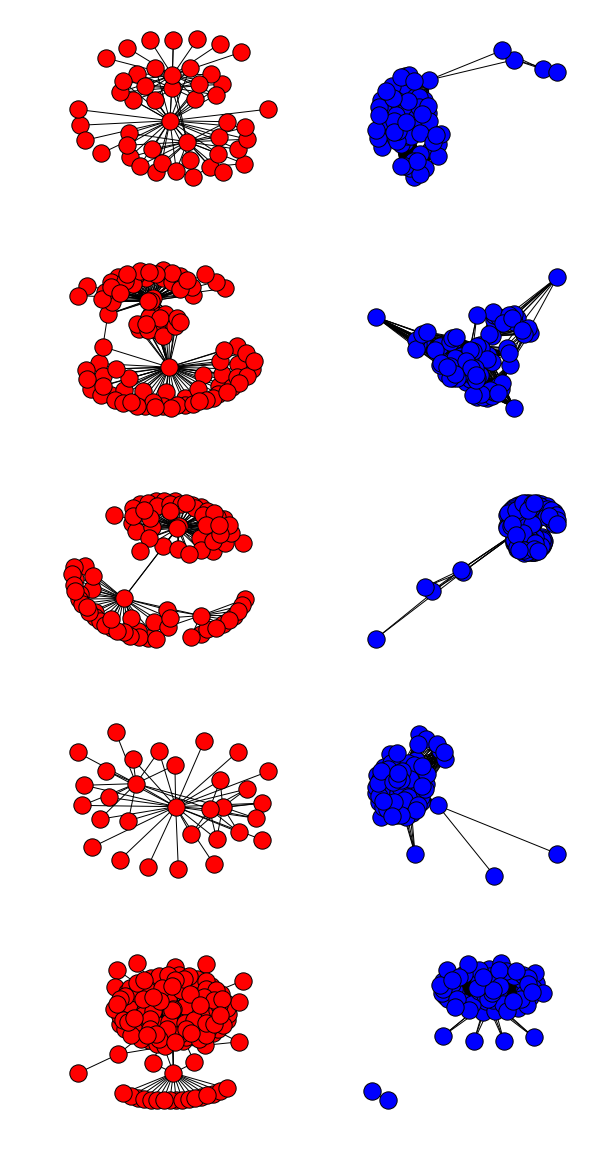

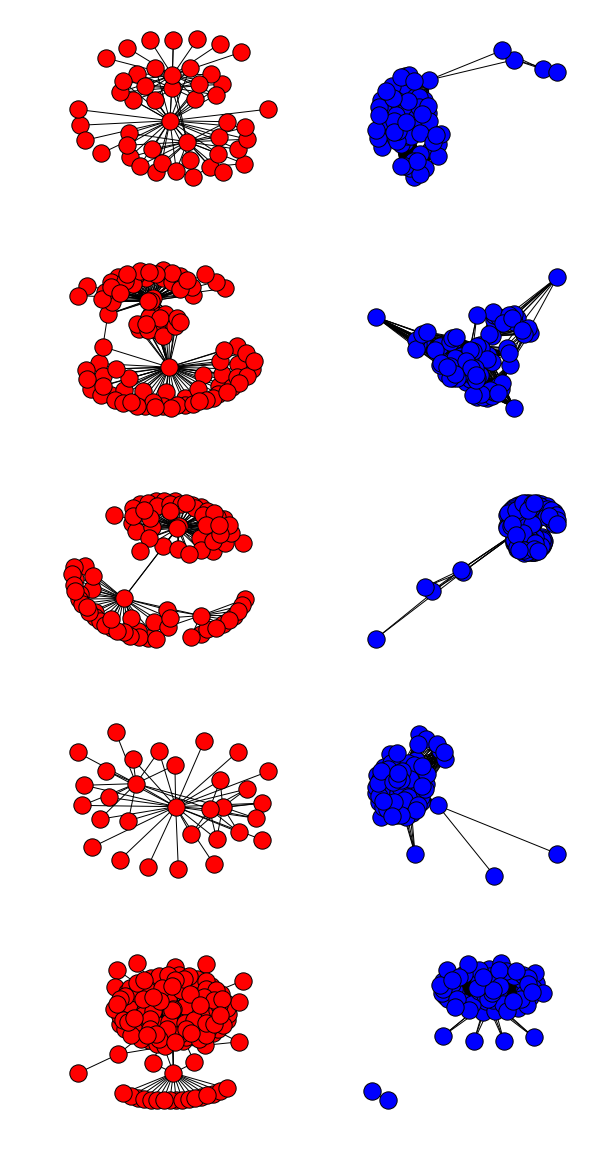

In [164]:
ige.generate_plots_experiment_1(results_5)

In [165]:
#plt.savefig('pairwise_incompatibility_graphs_HIV-1.pdf')

In [79]:
p_recomb =  map(compute_staryness,results_5['recomb_graphs_incomp'])
p_recurr =  map(compute_staryness,results_5['recurrent_graphs_incomp'])

print sum(p_recomb)/len(p_recomb)
print sum(p_recurr)/len(p_recurr)


0.0416534585974
0.356999195866


In [81]:
results_5.keys()

['recurrent_sim',
 'incomp_rate_recomb',
 'recomb_sim',
 'recomb_graphs_incomp',
 'recomb_graphs',
 'recurrent_graphs',
 'recurrent_graphs_incomp',
 'incomp_rate_recurr']

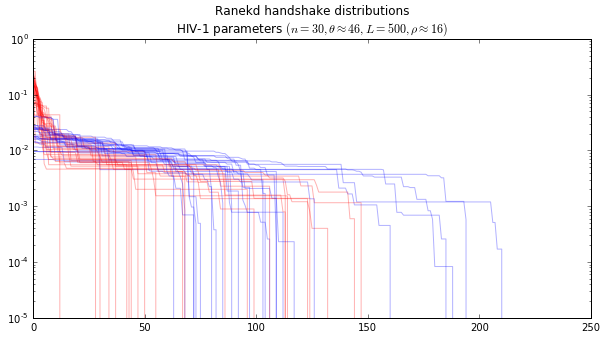

In [162]:
recomb_handshakes = map(ige.ranked_handshake_distribution,results_5['recomb_graphs'])
recurr_handshakes = map(ige.ranked_handshake_distribution,results_5['recurrent_graphs'])

fig = plt.figure(figsize = (10,5))
ax = plt.subplot(111)
for i in range(N):
    plt.plot(range(len(recomb_handshakes[i])),recomb_handshakes[i],'-b', alpha = 0.3)
    plt.plot(range(len(recurr_handshakes[i])),recurr_handshakes[i], '-r', alpha = 0.3)
#plt.grid(True)
title_str = 'Ranekd handshake distributions\n' \
            + r'HIV-1 parameters $(n= 30, \theta \approx 46, L = 500, \rho \approx 16)$'
plt.title(title_str)
ax.set_yscale("log", nonposy='clip')
ax.set_xlim(left=0,right=250)

fig.savefig('handshake_distributions_simulated_HIV-1.pdf')

In [33]:
# figname = 'figures/exp_1_L_%i_n_%i_t-high_%s_t-low_%s_rho_%s'%(sites,n,str(t_high),str(t_low),str(rho))
# fig.savefig('%s.pdf'%figname,bbox_inches=0)
# fig.savefig('%s.png'%figname,bbox_inches=0)
## fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.pdf',bbox_inches=0)
## fig.savefig('figures/exp_1_L_20000_n_10_theta_2_rho_1.png',bbox_inches=0)

In [34]:
# import cProfile, pstats, StringIO

# pr = cProfile.Profile()
# pr.enable()

# results = ige.run_experiment_1(N = 200, sequences=10, sites = 20000, theta_high_per_site= 0.0001, theta_low_per_site = 0.0001, rho_per_site= 0.00005)

# s = StringIO.StringIO()
# sortby = 'cumtime'
# ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
# ps.print_stats()
# print s.getvalue()